Imported the required libraries and packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

- **Pandas** for handling and analyzing structured data.
- **NumPy** for numerical computations.
- **Matplotlib & Seaborn** for data visualization.
- **Scipy.stats** for statistical hypothesis testing.

**Introduction**

Exploratory Data Analysis (EDA), hypothesis formulation, and testing through practical application for Online Shoppers Purchasing Intention Dataset. 
Description: Data on online shopping sessions intended to predict purchasing intentions.

In [35]:
# read file
df = pd.read_csv("online_shoppers_intention 2.csv")  

Data Cleaning and Formatting

In [28]:
df.head()  #  the first few rows

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [29]:
df.isnull().sum()  #  missing values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [30]:
df.info()  #  column types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [31]:
df.describe()  # summary statistics

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

In [32]:
# Count unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Unique values in Month:
Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

Unique values in VisitorType:
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

Unique values in Weekend:
Weekend
False    9462
True     2868
Name: count, dtype: int64

Unique values in Revenue:
Revenue
False    10422
True      1908
Name: count, dtype: int64


Dataset is clean—no missing values, and all columns are properly formatted. However, the Month column is stored as an object (string). So, we have to convert it into a numerical format or map it to month names. The `VisitorType` column also contains categories (e.g., "New_Visitor", "Returning_Visitor"). We convert it into numerical categorical codes for better processing.

In [33]:
# Convert Month to numerical values
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df['Month'] = df['Month'].map(month_mapping)

# Convert VisitorType into categories
df['VisitorType'] = df['VisitorType'].astype('category').cat.codes

Histogram helps identify skewness, outliers, and normality in data. 

Features like Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, and PageValues have highly right-skewed distributions. BounceRates and ExitRates have skewed distributions with most values concentrated near zero, a significant proportion of sessions have very low bounce and exit rates, but a few outliers exhibit higher rates. Some categories appear more frequently than others, suggesting user concentration in specific categories. Some categorical features (e.g., Month, OperatingSystems, TrafficType) display non-uniform distributions, indicating preferences for certain months, regions, or traffic sources.

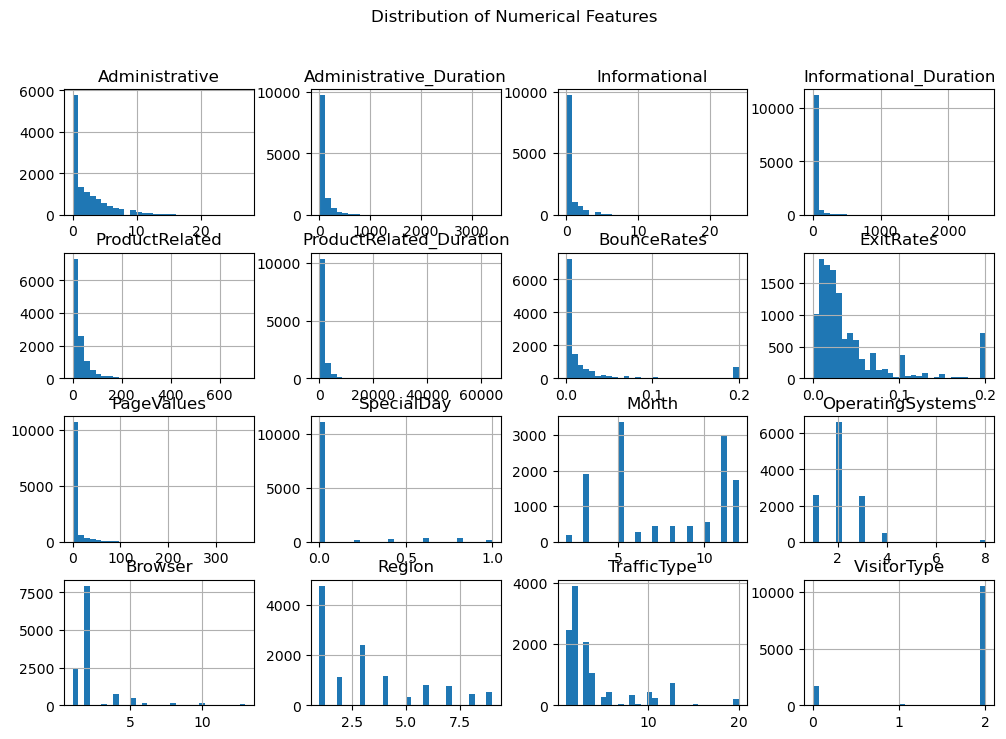

In [34]:
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Numerical Features")
plt.show()

Boxplot detects outliers that could affect analysis and Highlights extreme values that could affect analysis. The feature ProductRelated_Duration has extreme outliers, with values exceeding 60,000.
ther features like Administrative_Duration, Informational_Duration, PageValues, and ExitRates also show significant outliers, though to a lesser extent. Outliers may distort mean values, making it essential to consider median-based statistics. 

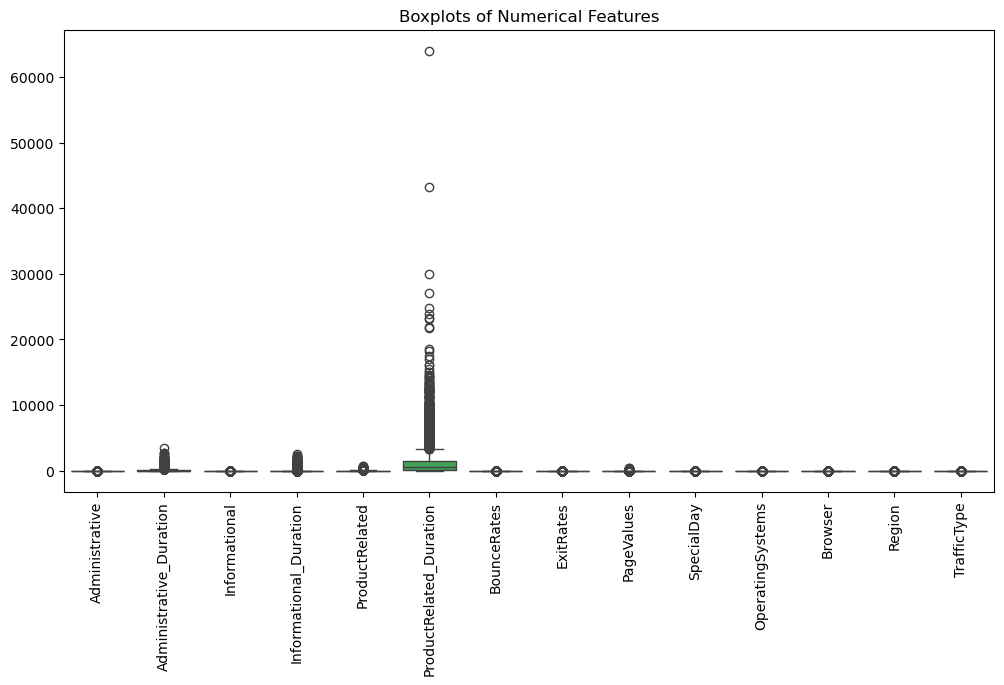

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.title("Boxplots of Numerical Features")
plt.show()

Correlation Matrix Heatmap

The heatmap displays how strongly different features are correlated. High correlation may indicate redundancy in features.

Interpretation:
- 1 (Red): Strong positive correlation → As one variable increases, the other also increases.  
- -1 (Blue): Strong negative correlation → As one variable increases, the other decreases.  
- 0 (White/Light Blue): No correlation → No linear relationship.  

Highly Correlated Features:
- ProductRelated vs. ProductRelated_Duration (0.86)  
  More product-related pages visited generally means more time spent on product-related pages.  

- BounceRates vs. ExitRates (0.91)  
  Strong positive correlation indicates that high bounce rates (users leaving after visiting one page) strongly align with high exit rates.  

- Administrative vs. Administrative_Duration (0.60)  
  Users spending more time on administrative pages tend to visit more such pages.  

- Informational vs. Informational_Duration (0.62)  
  Similar to administrative pages, time spent on informational pages increases with the number of visits.  

Features Correlated with Revenue:
- PageValues (0.49, Moderate Positive Correlation)  
  Higher PageValues (indicating engagement with important pages, possibly checkout pages) is positively linked with purchases.  

- BounceRates (-0.15, Weak Negative Correlation)  
  Higher bounce rates are weakly associated with lower purchase likelihood.  

- ExitRates (-0.21, Weak Negative Correlation)  
  A slightly stronger negative correlation than BounceRates, indicating that high exit rates decrease purchase likelihood.  

Weak or No Correlation with Revenue:
- SpecialDay (-0.02, Near Zero Correlation)  
  Special promotion days do not show a strong correlation with purchases, contradicting what one might expect.  

- TrafficType (-0.01) and Region (-0.00)  
  Traffic type and region do not significantly impact revenue.  


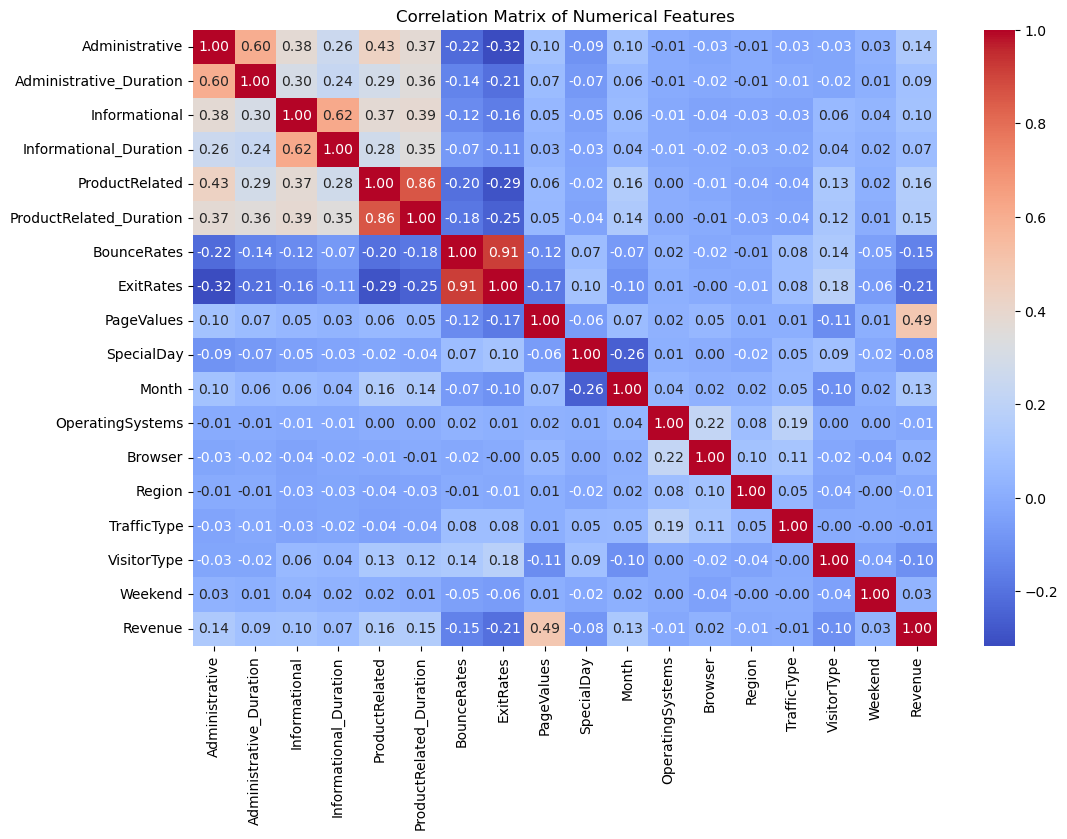

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


Bounce Rates vs. Revenue - Examines how bounce rates differ between users who made a purchase and those who didn't.


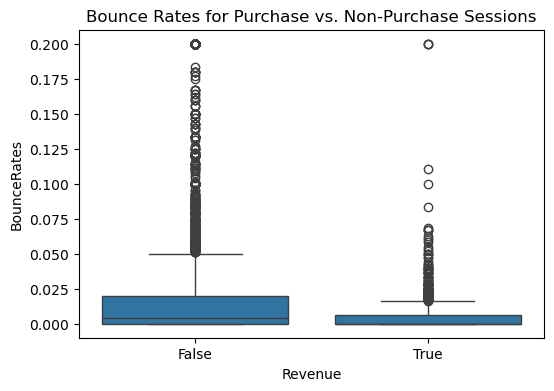

In [79]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Revenue', y='BounceRates', data=df)
plt.title("Bounce Rates for Purchase vs. Non-Purchase Sessions")
plt.show()

Page Values vs. Revenue - Investigates whether page values (which measure engagement) differ for purchases.

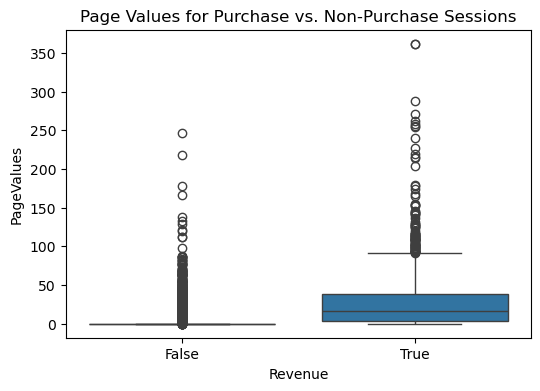

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Revenue', y='PageValues', data=df)
plt.title("Page Values for Purchase vs. Non-Purchase Sessions")
plt.show()

Hypothesis 1:

Null Hypothesis (H₀): There is no significant difference in the ProductRelated_Duration (time spent on product-related pages) between users who made a purchase (Revenue = 1) and those who did not (Revenue = 0).

Alternative Hypothesis (H₁): There is a significant difference in the ProductRelated_Duration between users who made a purchase and those who did not.

The time spent on product-related pages could reflect a user's interest, and we may hypothesize that users who spend more time on product pages are more likely to make a purchase.
We can use a t-test to compare the means of ProductRelated_Duration for users who made a purchase (Revenue = 1) and those who did not (Revenue = 0).

In [ ]:

# Split data into two groups: purchased and non-purchased
purchased_duration = df[df['Revenue'] == 1]['ProductRelated_Duration']
non_purchased_duration = df[df['Revenue'] == 0]['ProductRelated_Duration']

# Perform t-test
t_stat_duration, p_value_duration = ttest_ind(purchased_duration, non_purchased_duration)

# Output the results
print("T-Test Results for ProductRelated_Duration:")
print(f"T-statistic: {t_stat_duration}")
print(f"P-value: {p_value_duration}")

T-Test Results for ProductRelated_Duration:
T-statistic: 17.11804905311505
P-value: 6.115338253467455e-65


RULE

If the p-value is below 0.05, we reject the null hypothesis and conclude that there is a significant difference in time spent on product-related pages between users who made a purchase and those who did not. If the p-value is above 0.05, we fail to reject the null hypothesis, implying no significant difference.

The T-statistic of 17.118 is quite large, indicating a strong difference between the two groups.

The p-value is 6.11e-65, which is extremely small (much lower than the common 0.05 threshold).

Since the p-value is almost zero, we reject the null hypothesis (H₀) and conclude that users who made a purchase spent a significantly different amount of time on product-related pages compared to those who did not.

Hypothesis 2:


Null Hypothesis (H₀): There is no significant difference in the BounceRates (rate of users who leave the website after viewing only one page) between users who made a purchase (Revenue = 1) and those who did not (Revenue = 0).

Alternative Hypothesis (H₁): There is a significant difference in BounceRates between users who made a purchase and those who did not.

If a user makes a purchase, they may spend more time exploring other pages or products, which could lower their bounce rate. We can again use a t-test to compare the means of BounceRates for users who made a purchase and those who did not.

In [96]:
# Split data into two groups: purchased and non-purchased
purchased_bounce = df[df['Revenue'] == 1]['BounceRates']
non_purchased_bounce = df[df['Revenue'] == 0]['BounceRates']

# Perform t-test
t_stat_bounce, p_value_bounce = ttest_ind(purchased_bounce, non_purchased_bounce)

# Output the results
print("T-Test Results for BounceRates:")
print(f"T-statistic: {t_stat_bounce}")
print(f"P-value: {p_value_bounce}")

T-Test Results for BounceRates:
T-statistic: -16.922637906938064
P-value: 1.594197538516729e-63


Users who made a purchase spent significantly more time on product-related pages. The t-statistic (-16.92) is highly negative, indicating a large difference in BounceRates between users who made a purchase (Revenue = 1) and those who did not (Revenue = 0).
The p-value is practically 0, meaning the probability that this difference occurred by random chance is almost nonexistent.

Hypothesis 3:

Null Hypothesis (H₀): There is no significant relationship between the SpecialDay (specific days of promotion or event) and the likelihood of making a purchase (Revenue = 1 or Revenue = 0).

Alternative Hypothesis (H₁): The SpecialDay significantly impacts the likelihood of making a purchase.

Special days (such as promotions or discounts) are likely to encourage purchases. This hypothesis tests if there's a difference in the purchase behavior of users on special days versus regular days.

We can use a Chi-Square Test to test the association between SpecialDay and Revenue.

In [ ]:
# Create a contingency table
contingency_table_special_day = pd.crosstab(df['SpecialDay'], df['Revenue'])

# Perform Chi-Square test
chi2_special_day, p_special_day, dof_special_day, expected_special_day = chi2_contingency(contingency_table_special_day)

# Output the results
print("Chi-Square Test Results for SpecialDay and Revenue:")
print(f"Chi2 Statistic: {chi2_special_day}")
print(f"P-value: {p_special_day}")

Chi-Square Test Results for SpecialDay and Revenue:
Chi2 Statistic: 96.07690626757704
P-value: 3.543244340384197e-19


A high Chi² statistic (96.08) suggests that there is a notable difference in purchase behavior (Revenue) across different values of SpecialDay.
The p-value is practically 0, meaning the probability that this association occurred by random chance is almost nonexistent. Since p < 0.05, we reject the null hypothesis (H₀: No relationship between SpecialDay and Revenue).
This provides strong evidence that special days significantly impact purchase likelihood.

Since p < 0.05, we reject the null hypothesis (H₀: No relationship between SpecialDay and Revenue).
This provides strong evidence that special days significantly impact purchase likelihood.

**The sns.pairplot(df, hue="Revenue")**

This function generates a grid of scatter plots and histograms for all numerical features in my dataset, colored by the Revenue variable.
Each diagonal plot is a distribution (histogram or KDE) of a single feature.
Each non-diagonal plot is a scatter plot showing relationships between two features.

Blue (0 - No Purchase)

Orange (1 - Purchase)

Some features, like BounceRates and ExitRates, have skewed distributions.
ProductRelated_Duration and PageValues show clear separation between those who made a purchase and those who didn’t.
Some feature pairs show strong positive correlations, such as ProductRelated_Duration vs. PageValues.
There are clusters where revenue is mostly orange, indicating strong purchase behavior in certain conditions.

Some features show clear separation in purchasing behavior. For example, PageValues seems to be a strong differentiator between buyers and non-buyers.
Features like BounceRates and ExitRates seem to have an inverse relationship with purchases—higher values mean a lower likelihood of purchase.


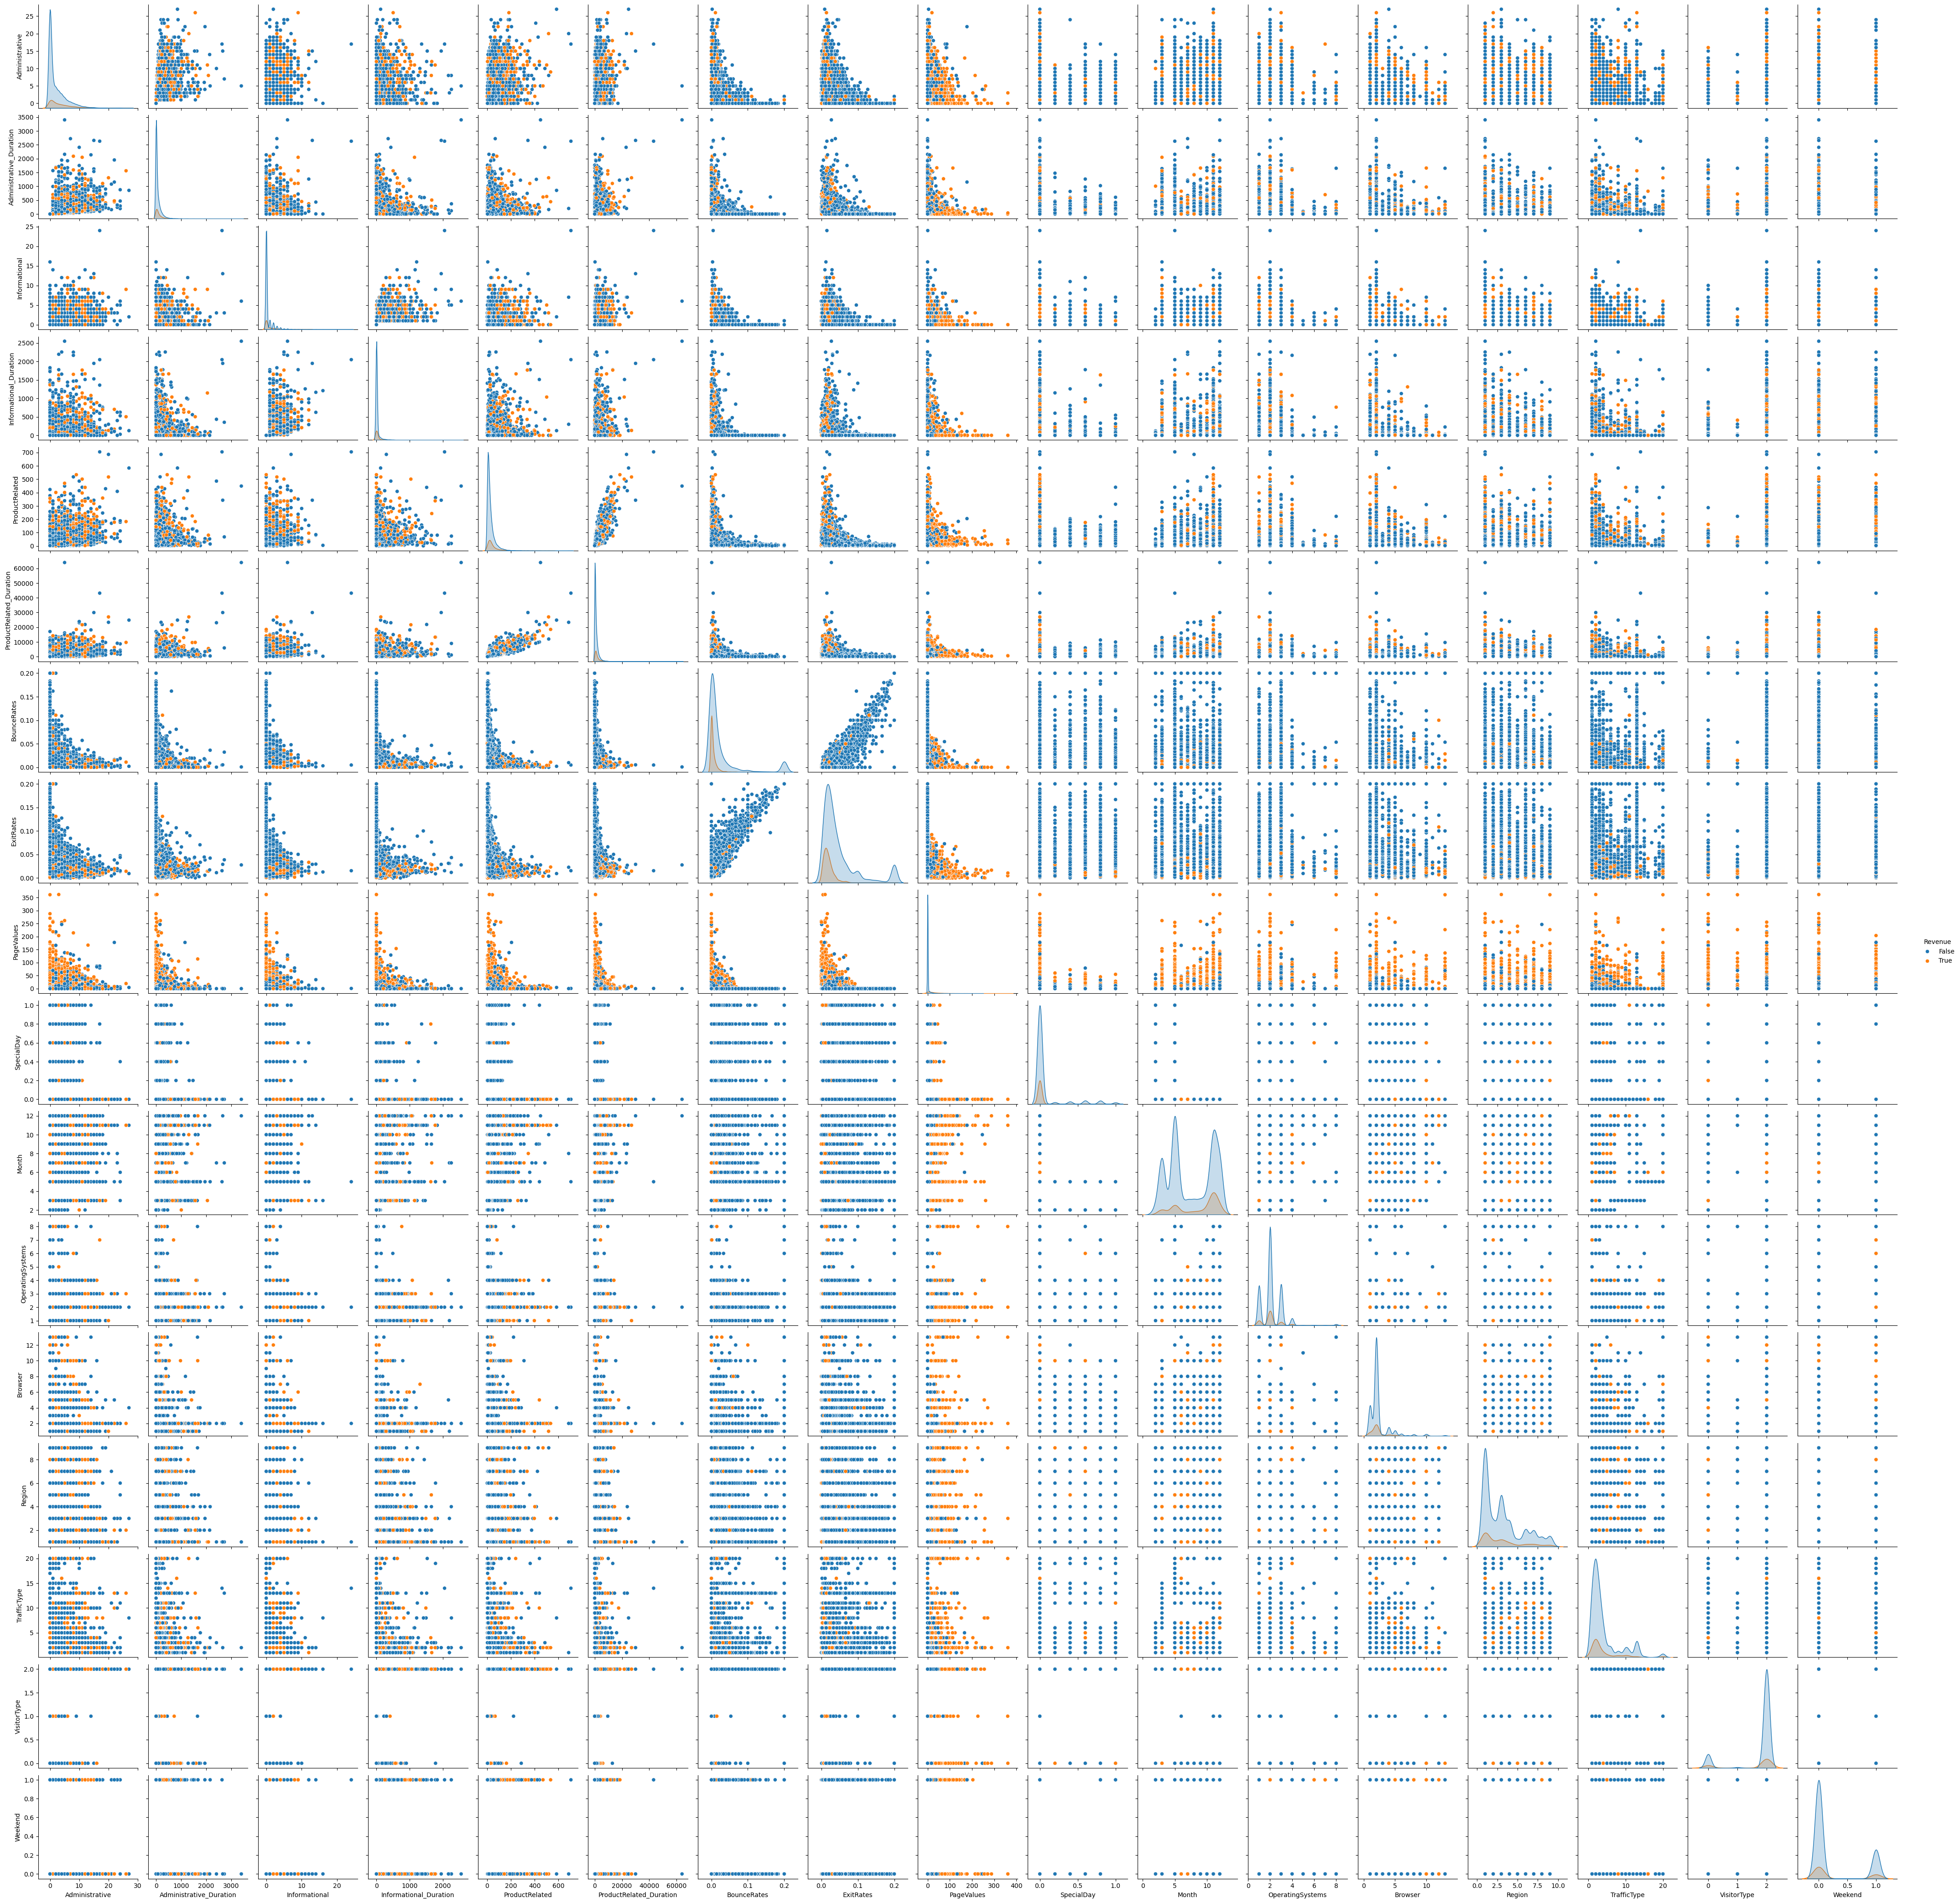

In [94]:
sns.pairplot(df, hue="Revenue")
plt.show()

**Conclusion**
- We conducted EDA and visualizations to understand data distributions.
- We tested three hypotheses using **t-tests and chi-square tests**.
- Our results will help determine factors influencing purchases on the website.
